<a href="https://colab.research.google.com/github/bradencruzzz/movie-budgets-grossing-machine-learning-seaborn/blob/main/movie_budgets_grossing_machine_learning_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
# shape
data.shape

(5391, 6)

In [5]:
#NaN value
data.isna().sum()

,0
Rank,0
Release_Date,0
Movie_Title,0
USD_Production_Budget,0
USD_Worldwide_Gross,0
USD_Domestic_Gross,0


In [7]:
# Duplicates
print(data.duplicated().sum())

0


In [11]:
# Dtype of columns
type(data.columns)

pandas.core.indexes.base.Index

  ### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [38]:
chars_to_remove = ['$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "").astype(float)
    data[col] = pd.to_numeric(data[col])


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [39]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(data.head())

   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation             110,000.00   
1  5140   1916-05-09                     Intolerance             385,907.00   
2  5230   1916-12-24    20,000 Leagues Under the Sea             200,000.00   
3  5299   1920-09-17  Over the Hill to the Poorhouse             100,000.00   
4  5222   1925-01-01                  The Big Parade             245,000.00   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0        11,000,000.00       10,000,000.00  
1                 0.00                0.00  
2         8,000,000.00        8,000,000.00  
3         3,000,000.00        3,000,000.00  
4        22,000,000.00       11,000,000.00  


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [41]:
# average prod budget
print(f" ${data['USD_Production_Budget'].mean():,.2f}")

 $31,113,737.58


In [42]:
# avg worldwide gross revenue
print(f" ${data['USD_Worldwide_Gross'].mean():,.2f}")

 $88,855,421.96


In [50]:
# minimums for worldwide and domestic revenue
print(f" ${data['USD_Worldwide_Gross'].min():,.2f}")
print(f" ${data['USD_Domestic_Gross'].min():,.2f}")
print(f"Number of fils that grossed $0 worldwide: {len(data[data['USD_Domestic_Gross'] == 0])}")
print(f"Number of fils that grossed $0 worldwide: {len(data[data['USD_Worldwide_Gross'] == 0])}")

 $0.00
 $0.00
Number of fils that grossed $0 worldwide: 512
Number of fils that grossed $0 worldwide: 357


In [48]:
# analyze bottom 25% of films
quantile_25 = data['USD_Worldwide_Gross'].quantile(0.25)
bottom_25_percent = data[data['USD_Worldwide_Gross'] <= quantile_25]
print("Descriptive statistics for the bottom 25% of films by worldwide gross:")
display(bottom_25_percent.describe())

Descriptive statistics for the bottom 25% of films by worldwide gross:


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"1,348.00",1348,"1,348.00","1,348.00","1,348.00"
mean,"4,235.44",2006-06-20 21:18:41.661721088,"6,170,942.92","732,665.92","496,227.98"
min,96.00,1916-05-09 00:00:00,"1,100.00",0.00,0.00
25%,"3,668.75",2003-03-10 00:00:00,"795,000.00",0.00,0.00
50%,"4,510.50",2009-06-22 12:00:00,"2,400,000.00","154,405.50","52,193.00"
75%,"4,992.25",2014-03-10 00:00:00,"8,000,000.00","1,165,325.50","558,858.50"
max,"5,391.00",2020-12-31 00:00:00,"175,000,000.00","3,858,964.00","3,816,594.00"
std,977.84,NaN,"11,007,518.53","1,040,518.65","849,797.60"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [62]:
data[data['USD_Domestic_Gross'] == 0].sort_values('USD_Production_Budget', ascending = False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [63]:
data[data['USD_Worldwide_Gross'] == 0].sort_values('USD_Production_Budget', ascending = False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [64]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f"Number of International releases: {len(international_releases)}")
international_releases.tail()

Number of International releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00
5374,4237,2017-08-25,Polina danser sa vie,"4,000,000.00","36,630.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [65]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [76]:
# Released after time of data collection
unreleased = data[data['Release_Date'] >= scrape_date]
print(f"Number of unreleased films: {len(unreleased)}")
unreleased

Number of unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The","20,000,000.00",0.00,0.00


In [78]:
data_clean = data.drop(unreleased.index)
print(f"Number of films after cleaning: {len(data_clean)}")

Number of films after cleaning: 5384


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [94]:
lost_money = (data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]).count()
print(f"Number of films that lost money: {lost_money.iloc[0]}")
print(f"Percentage of films that lost money: {lost_money.iloc[0]/len(data_clean):.2%}")
broke_even = (data_clean[data_clean['USD_Production_Budget'] == data_clean['USD_Worldwide_Gross']]).count()
print(f"Number of films that broke even: {broke_even.iloc[0]}")

Number of films that lost money: 2007
Percentage of films that lost money: 37.28%
Number of films that broke even: 0


# Seaborn for Data Viz: Bubble Charts

In [95]:
import seaborn as sns

In [ ]:
# changing scale
data_clean['USD_Worldwide_Gross_Billions'] = data_clean['USD_Worldwide_Gross'] / 1_000_000_000
data_clean['USD_Production_Budget_Millions'] = data_clean['USD_Production_Budget'] / 1_000_000

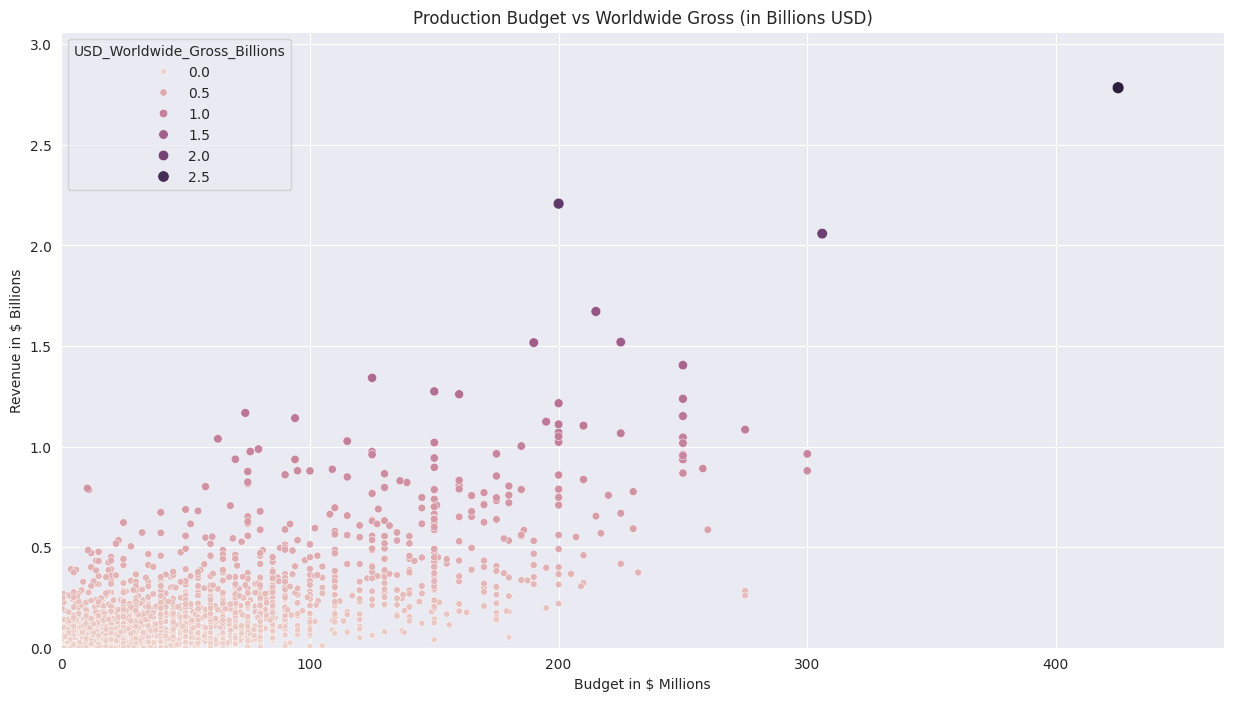

In [159]:
plt.figure(figsize=(15, 8))

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget_Millions',
                y='USD_Worldwide_Gross_Billions',
                hue='USD_Worldwide_Gross_Billions', # Use billions for hue as well for consistent coloring
                size='USD_Worldwide_Gross_Billions') # Use billions for size

ax.set(ylim=(0, data_clean['USD_Worldwide_Gross_Billions'].max() * 1.1), # Adjust limits based on new scale
       xlim=(0, data_clean['USD_Production_Budget_Millions'].max() * 1.1), # Adjust limits based on new scale
       ylabel='Revenue in $ Billions', # Update ylabel
       xlabel='Budget in $ Millions') # Update xlabel

ax.set_title('Production Budget vs Worldwide Gross (in Billions USD)')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [156]:
# dates to decades column
dates = pd.DatetimeIndex(data=data_clean['Release_Date'])
years = dates.year
decades = (dates.year // 10) * 10
print(decades)
data_clean['Release_Decade'] = decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)


In [157]:
# change scale
data_clean['USD_Worldwide_Gross_Billions'] = data_clean['USD_Worldwide_Gross'] / 1_000_000_000
data_clean['USD_Production_Budget_Millions'] = data_clean['USD_Production_Budget'] / 1_000_000

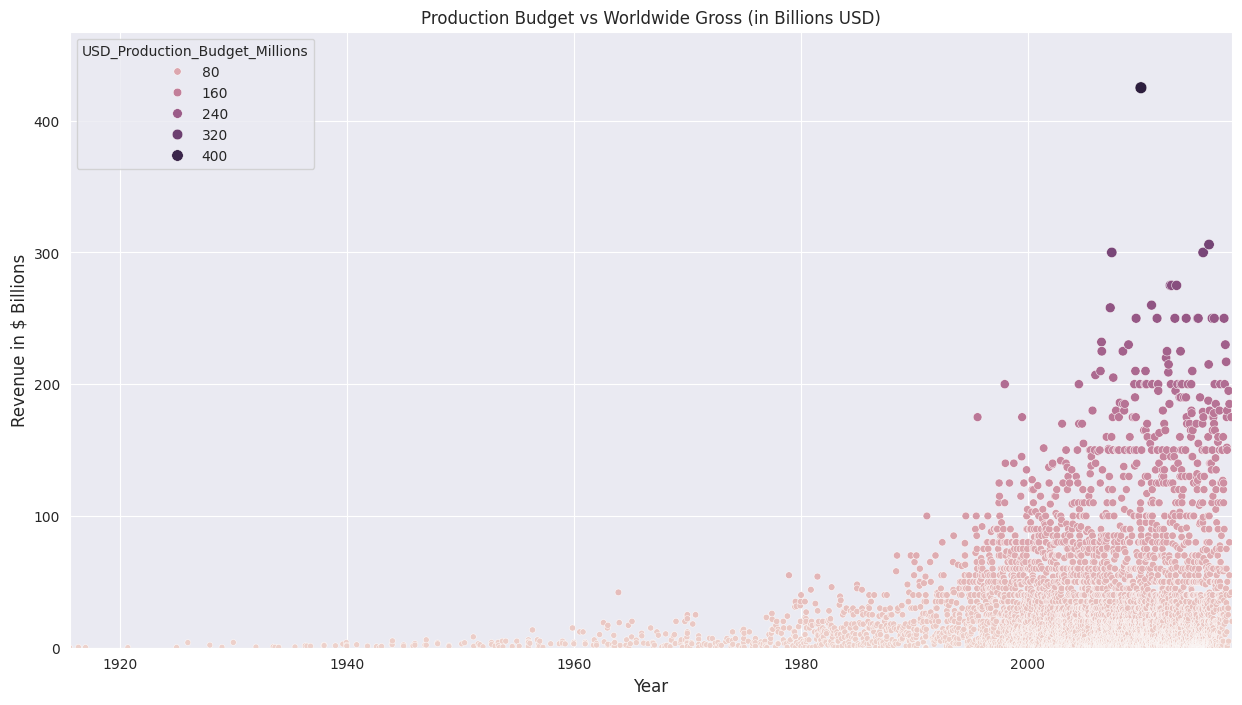

In [160]:
# recreate chart
plt.figure(figsize=(15, 8))

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                x='Release_Date',
                y='USD_Production_Budget_Millions',
                hue='USD_Production_Budget_Millions', # Use billions for hue as well for consistent coloring
                size='USD_Production_Budget_Millions') # Use billions for size

ax.set(ylim=(0, data_clean['USD_Production_Budget_Millions'].max() * 1.1),
       xlim=(data_clean.Release_Date.min(), data_clean['Release_Date'].max()),
       ylabel='Revenue in $ Billions', # Update ylabel
       xlabel='Year') # Update xlabel

ax.set_title('Production Budget vs Worldwide Gross (in Billions USD)')

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
# dates to decades column
dates = pd.DatetimeIndex(data=data_clean['Release_Date'])
years = dates.year
decades = (dates.year // 10) * 10
print(decades)
data_clean['Release_Decade'] = decades

In [168]:
# New df's
old_films = data_clean[data_clean['Release_Decade'] <= 1969]
new_films = data_clean[data_clean['Release_Decade'] > 1969]

print(f"Number of films released before 1970: {len(old_films)}")
print(f"Most expensive film before 1970: ${old_films['USD_Production_Budget'].max():,.2f}")
print(f"Number of films released after 1969: {len(new_films)}")
print(f"Most expensive film after 1969: ${new_films['USD_Production_Budget'].max():,.2f}")

Number of films released before 1970: 153
Most expensive film before 1970: $42,000,000.00
Number of films released after 1969: 5231
Most expensive film after 1969: $425,000,000.00


# Seaborn Regression Plots

In [169]:
import seaborn as sns

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

Text(0.5, 1.0, 'Budget vs Gross Earnings (Old Films)')

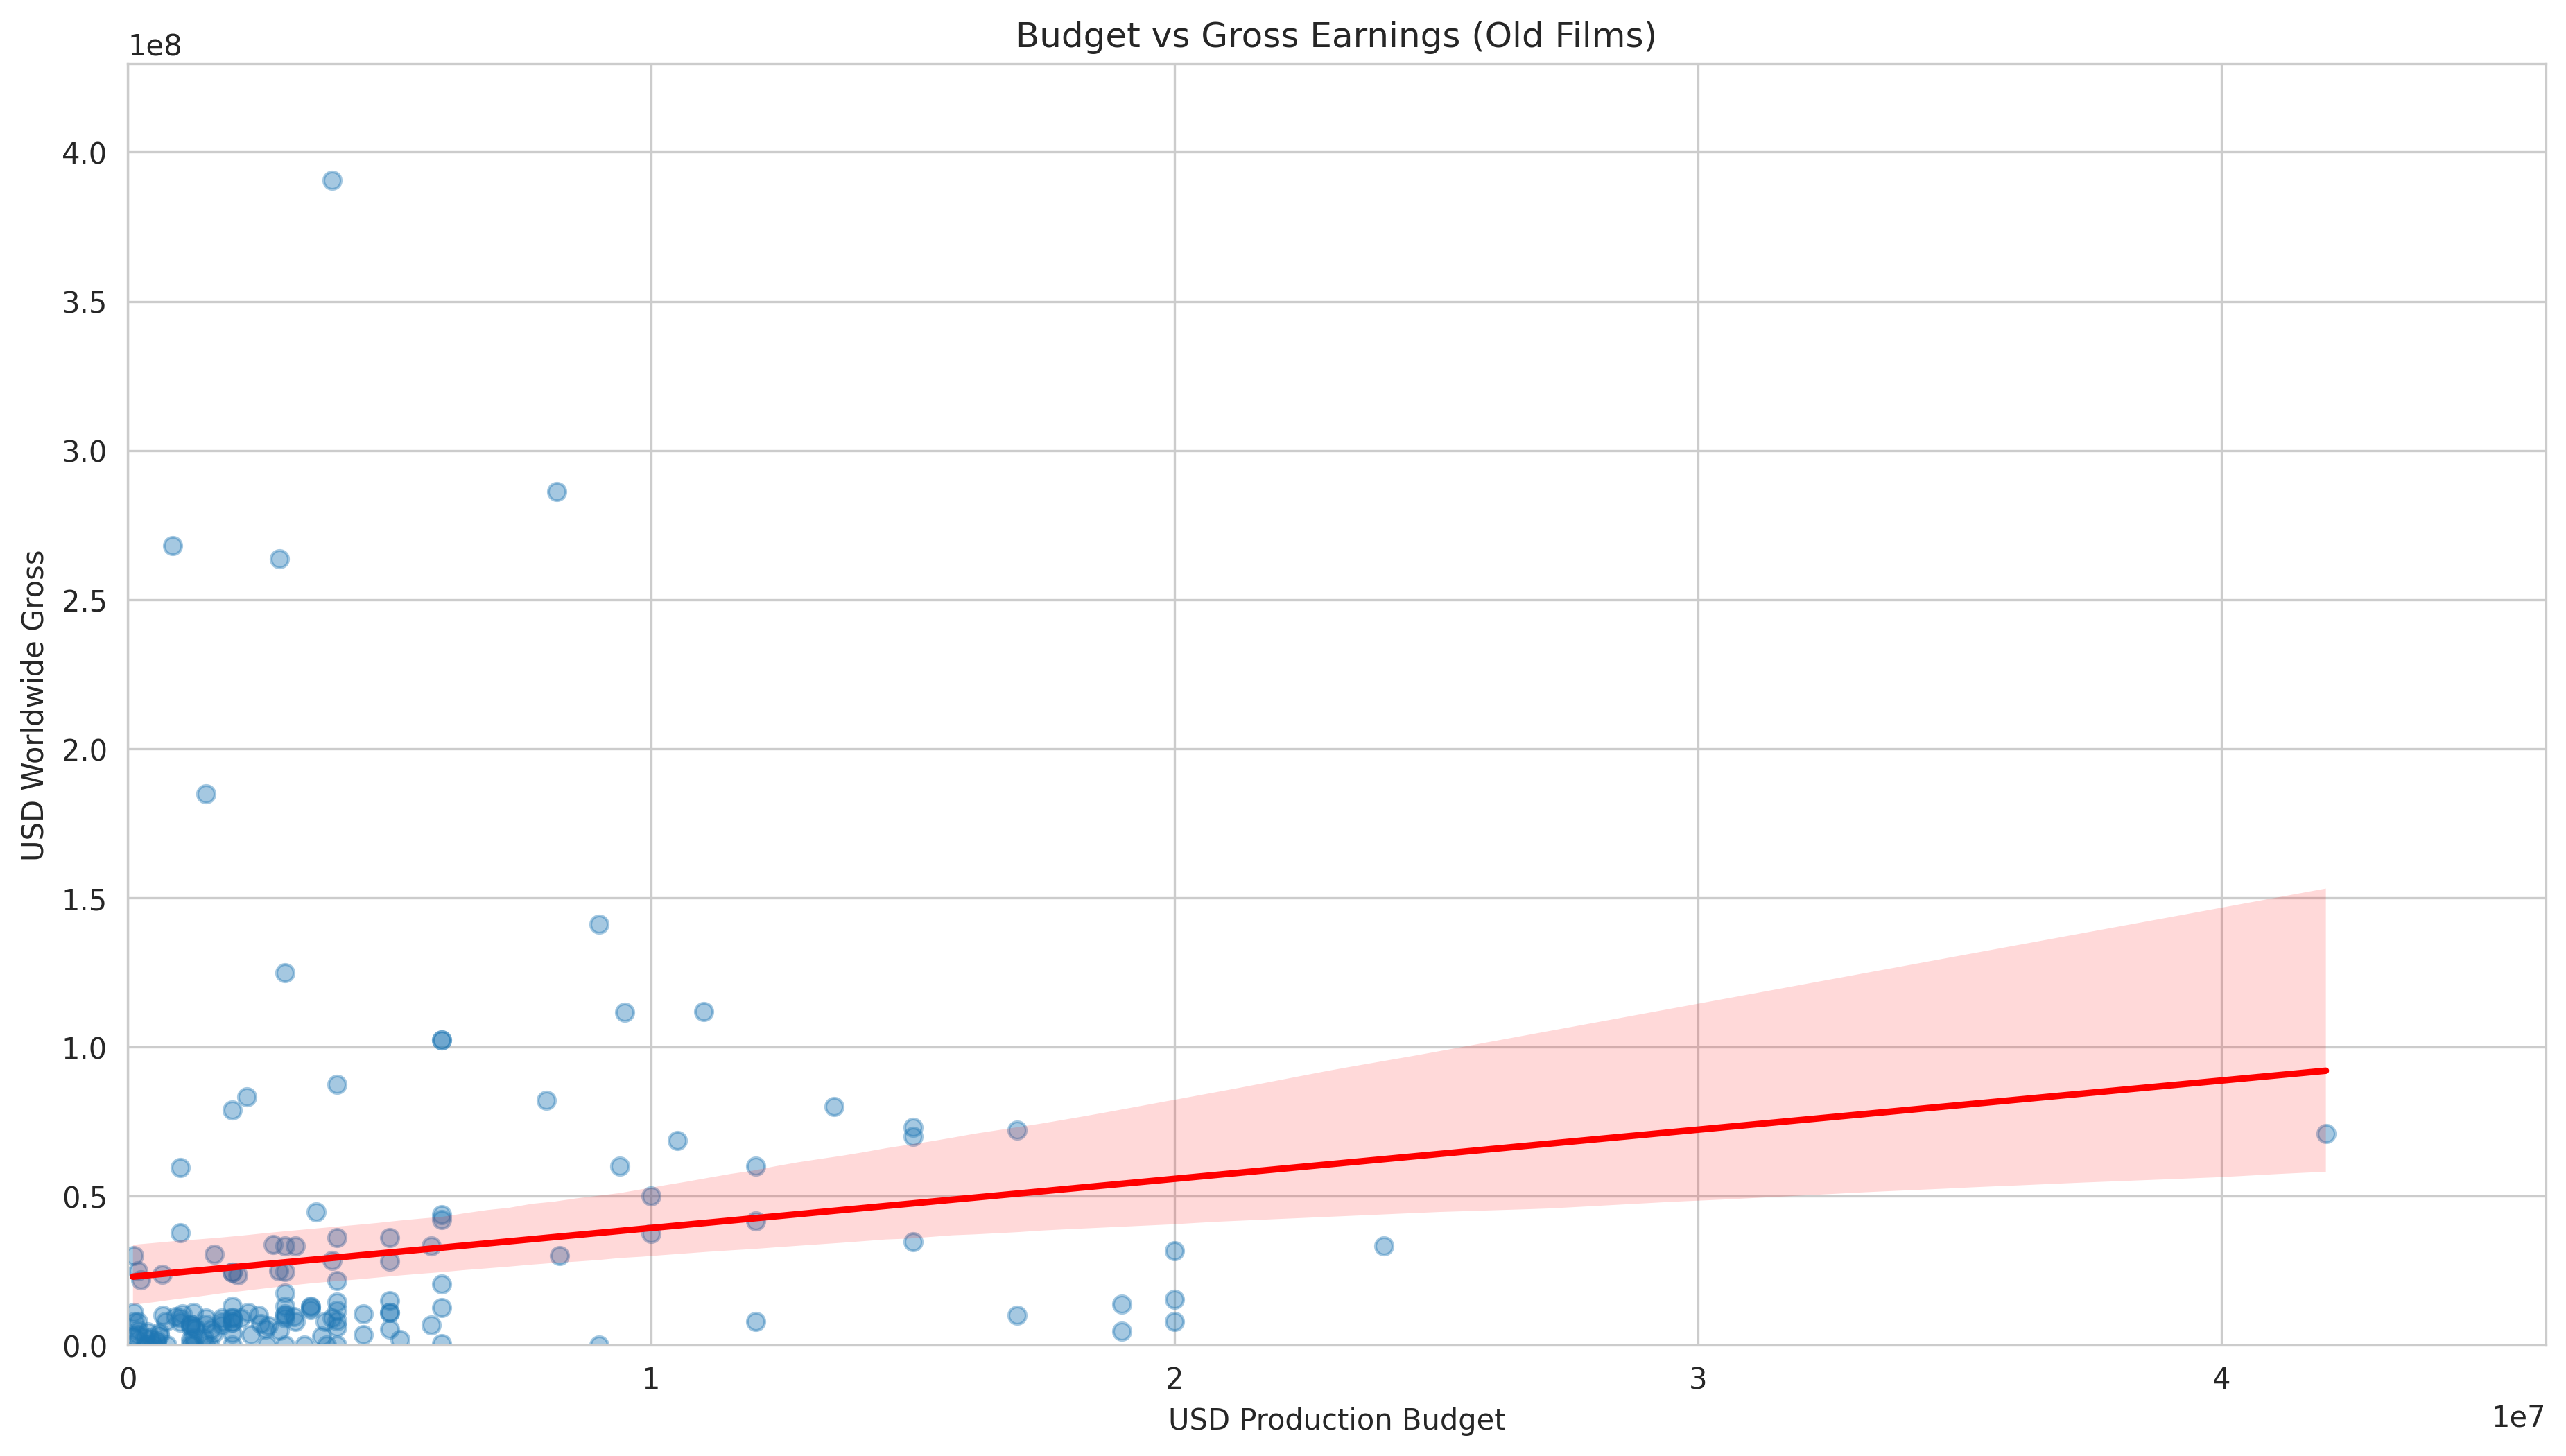

In [193]:
# Budget vs Gross Earnings (Old Films)
plt.figure(figsize=(15, 8), dpi=300)
with sns.axes_style('whitegrid'):
  ax = sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'})

ax.set(xlim=(0, old_films['USD_Production_Budget'].max() * 1.1),
       ylim=(0, old_films['USD_Worldwide_Gross'].max() * 1.1),
       ylabel='USD Worldwide Gross',
       xlabel='USD Production Budget')

ax.set_title('Budget vs Gross Earnings (Old Films)') # Corrected line

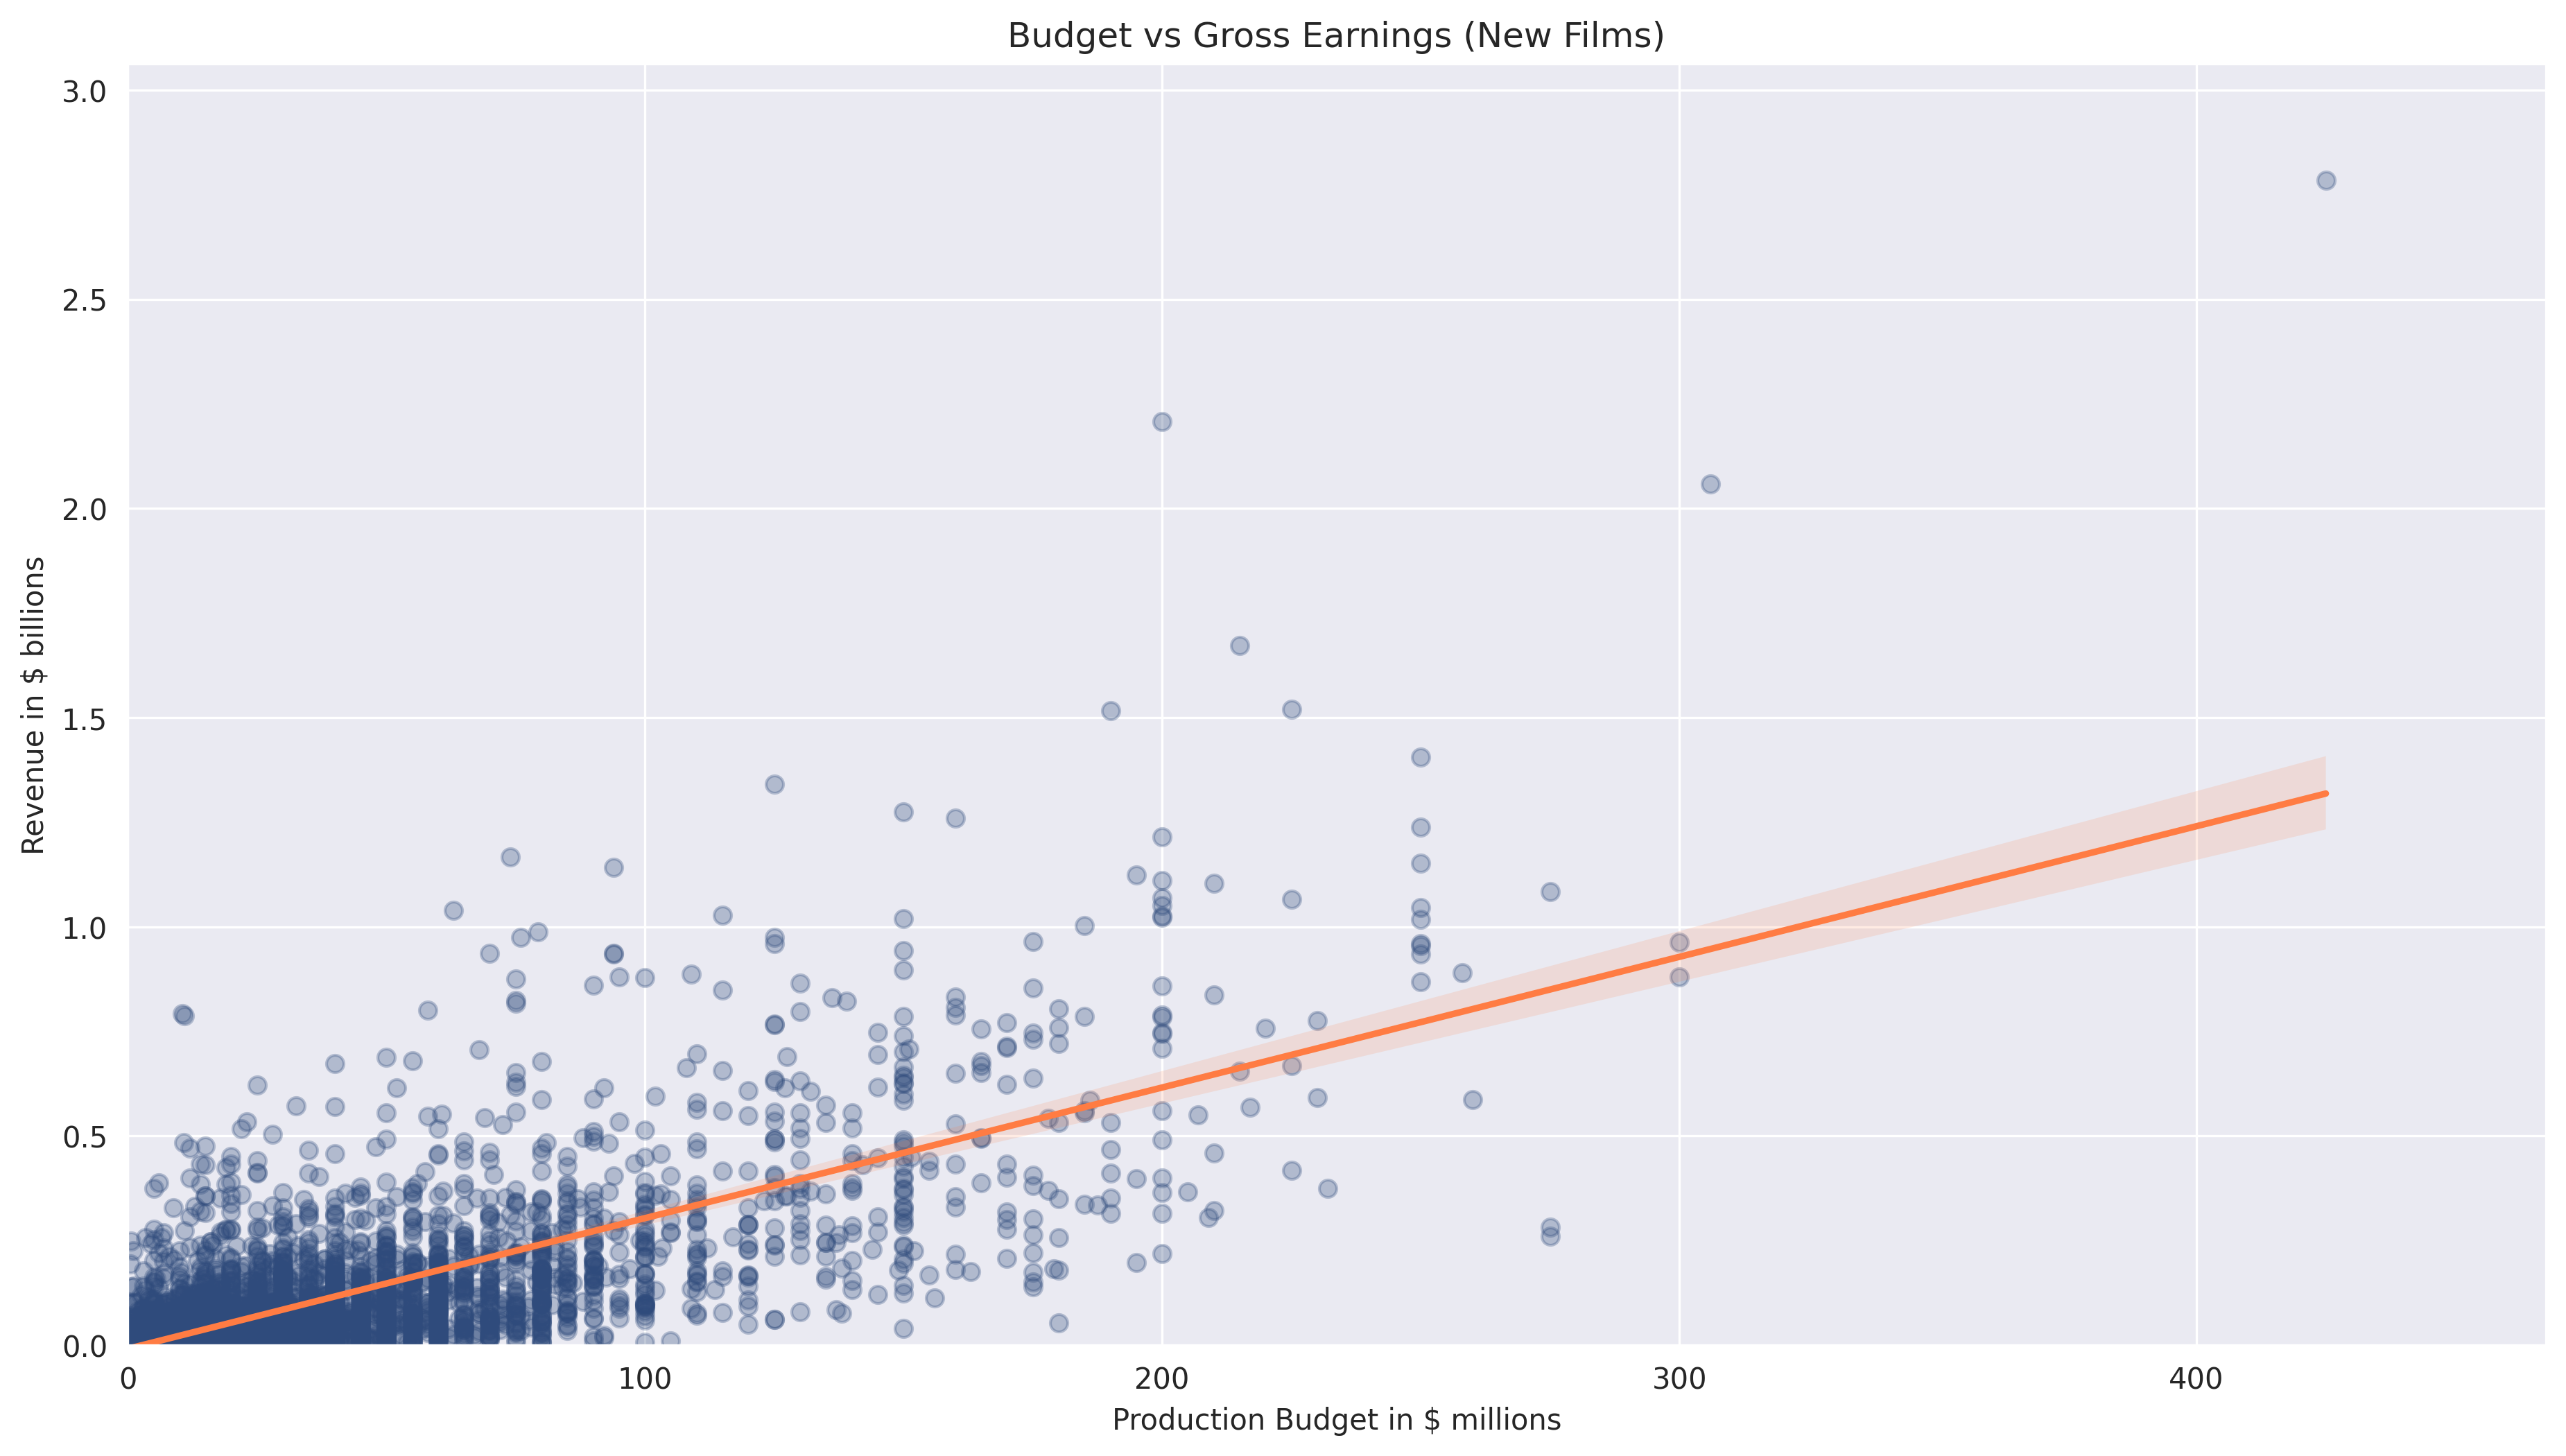

In [195]:
# Budget vs Gross Earnings (New Films)
plt.figure(figsize=(15, 8), dpi=300)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
            x='USD_Production_Budget_Millions',
            y='USD_Worldwide_Gross_Billions',
            color = '#2f4b7c',
            scatter_kws={'alpha': 0.3},
            line_kws={'color': '#ff7c43'})

  ax.set(xlim=(0, new_films['USD_Production_Budget_Millions'].max() * 1.1),
        ylim=(0, new_films['USD_Worldwide_Gross_Billions'].max() * 1.1),
        ylabel='Revenue in $ billions',
        xlabel='Production Budget in $ millions')

  ax.set_title('Budget vs Gross Earnings (New Films)') # Corrected line

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
# univariate regression, single explanatory variable (feature)

In [196]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [197]:
regression = LinearRegression()

In [209]:
# Regression for New Films:
# Explanatory Variable(s) as X (features)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable/Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])  # create 2 new df's bc LinearRegression does not respond well to Pandas Series

# Run regression line
print(regression.fit(X, y))

# y-int (Theta zero)
print(f"regression intercept: {regression.intercept_}")

# Slops (theta one)
print(f"slope: {regression.coef_}")

# R-squared
print(f"R-squared: {regression.score(X, y)}") # explains about 56% of the variance only using 1 feature and the simplest model!

LinearRegression()
regression intercept: [-8650768.00661027]
slope: [[3.12259592]]
R-squared: 0.5577032617720403


In [211]:
# Regression for Old Films:
# Explanatory Variable(s) as X (features)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable/Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])  # create 2 new df's bc LinearRegression does not respond well to Pandas Series

# Run regression line
print(regression.fit(X, y))

# y-int (Theta zero)
print(f"regression intercept: {regression.intercept_}")

# Slops (theta one)
print(f"slope: {regression.coef_}")

# R-squared
print(f"R-squared: {regression.score(X, y)}") # not as good of a fit as for new films

LinearRegression()
regression intercept: [22821538.63508039]
slope: [[1.64771314]]
R-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [218]:
# revenue estimation
budget = 350000000
revenue_estimate = regression.intercept_[0] + (regression.coef_[0, 0] * budget) # unwrap arrays
print(f"Estimated revenue: ${revenue_estimate:,.2f}")



Estimated revenue: $599,521,139.04
